In [15]:
#desativando os warnings chatos
import warnings
warnings.filterwarnings("ignore")

In [52]:

import pandas as pd

pd.set_option('max_columns', 99)

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [84]:
#carregando os dados
stackoverflow = pd.read_csv('datasets/survey_results_public.csv')
#stackoverflow.fillna('N/A', inplace=True)

### Pergunta 1
Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico de colunas com a média de salário (ConvertedComp) por formação (EdLevel), filtrando os dados da França, como fica o gráfico?

In [85]:
#Criando um dataframe com  um grupo da coluna EdLevel e pegando o ConvertedComp e salvando em edLevel_salary
edLevel_salary = pd.DataFrame(stackoverflow.groupby('EdLevel').count()['ConvertedComp'])

In [86]:
edLevel_salary.sort_values('ConvertedComp', ascending=False)

,ConvertedComp
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16874
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8668
Some college/university study without earning a degree,4086
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1466
"Associate degree (A.A., A.S., etc.)",1168
"Other doctoral degree (Ph.D., Ed.D., etc.)",1142
"Professional degree (JD, MD, etc.)",477
I never completed any formal education,154
Primary/elementary school,153


In [87]:
edLevel_salary_sort = edLevel_salary.sort_values('ConvertedComp', ascending=False) #salvando os dados  organizados

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

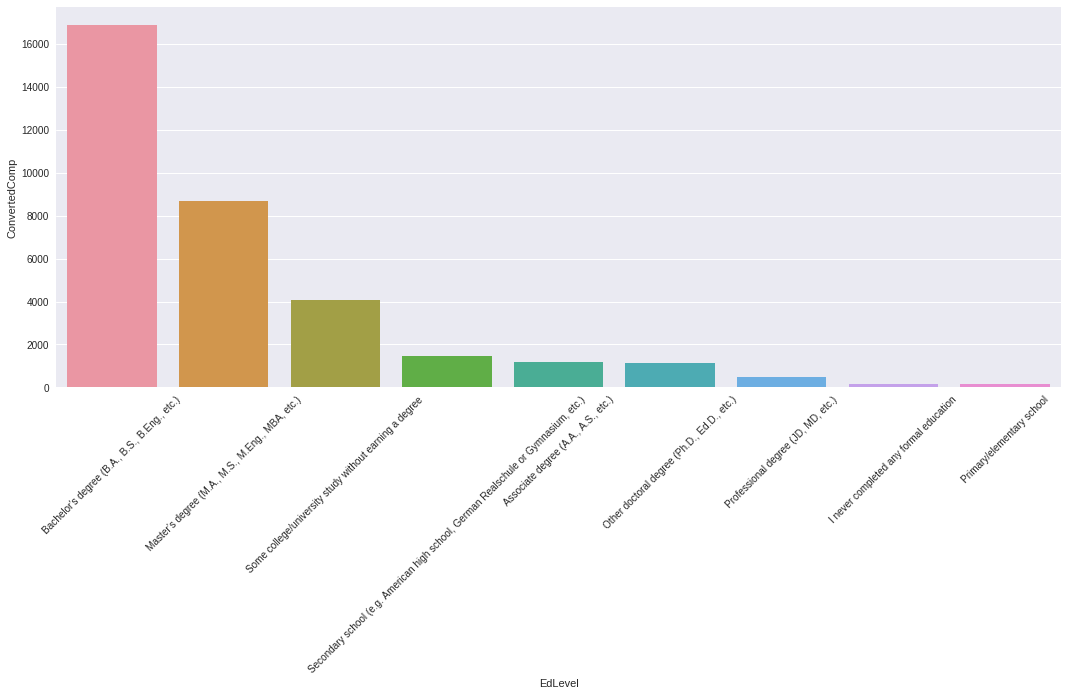

In [88]:
plt.figure(figsize=(18, 7))
sns.barplot(x=edLevel_salary_sort.index, y=edLevel_salary_sort['ConvertedComp'])

plt.xticks(rotation=45) #rotacionando o grafico, se não fica uma bagunça só

### Pergunta 2
Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico de colunas com a média de salário (ConvertedComp) por nível de satisfação (JobSat), filtrando os dados do Chile, como fica o gráfico?
Grupo de escolhas da pergunta


In [89]:
jobSat_salary = pd.DataFrame(stackoverflow.groupby('JobSat').count()['ConvertedComp'])

In [90]:
jobSat_salary.sort_values('ConvertedComp', ascending=False)

,ConvertedComp
JobSat,
Very satisfied,11312
Slightly satisfied,10785
Slightly dissatisfied,5746
Neither satisfied nor dissatisfied,4066
Very dissatisfied,2792


In [91]:
jobSat_salarySort = jobSat_salary.sort_values('ConvertedComp', ascending=False)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

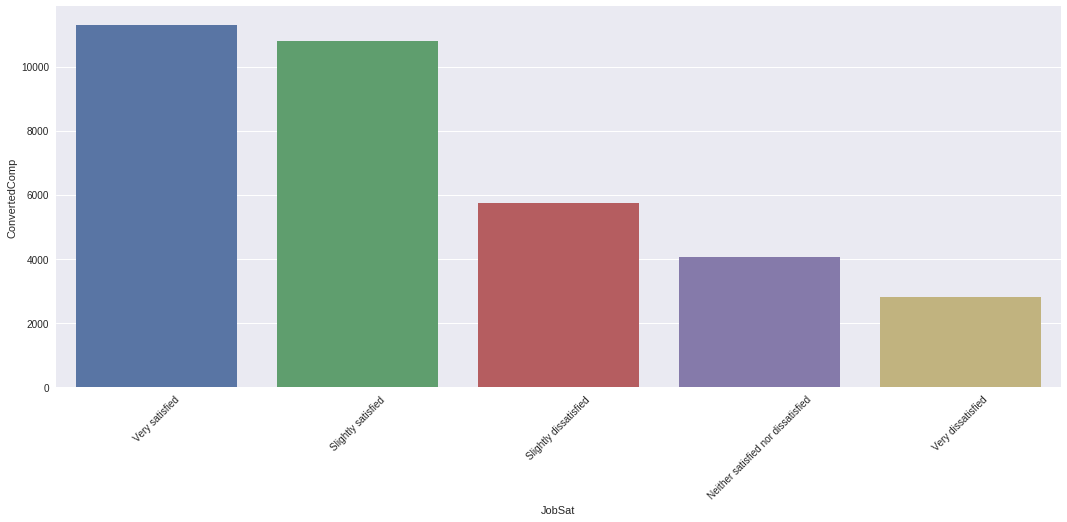

In [92]:
plt.figure(figsize=(18, 7))
sns.barplot(x=jobSat_salarySort.index, y=jobSat_salarySort['ConvertedComp'])

plt.xticks(rotation=45) #rotacionando o grafico, se não fica uma bagunça só

### Pergunta 3
Utilize o Power BI e o dataset das instruções do enunciado. Crie um gráfico para analisar o uso dos Sistemas Operacionais (OpSys). Qual a Sistema Operacional mais usado na França?

In [93]:
france_sysOp = pd.DataFrame(france_stackoverflow.groupby('OpSys').count()['Respondent'].sort_values(ascending=False))

In [94]:
france_sysOp

,Respondent
OpSys,
Linux-based,700
Windows,658
MacOS,336


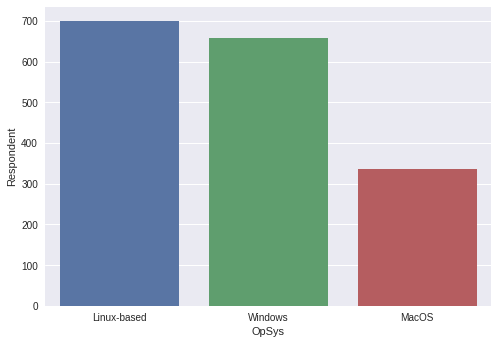

In [95]:
sns.barplot(x=france_sysOp.index, y=france_sysOp.Respondent)

### Pergunta 4
Utilize o Power BI e o dataset das instruções do enunciado. Crie um gráfico de dispersão com a idade (Age) e a média de salário por idade (ConvertedComp). Filtre por Albânia e adicione uma linha de tendência. Analisando a linha de tendência, podemos afirmar que à medida que a idade aumenta, o salário:

In [96]:
albania_stack = stackoverflow[stackoverflow['Country'] == 'Albania']

In [ ]:
albania_age_mean_Salary = pd.DataFrame(albania_stack.groupby('Age').mean()['ConvertedComp'])

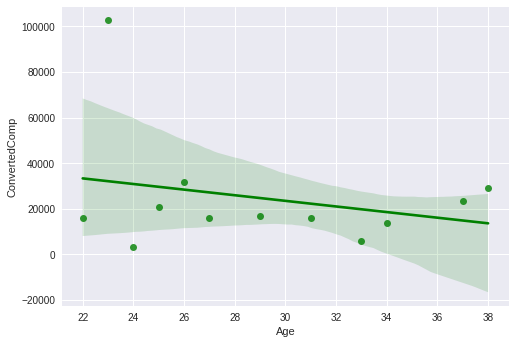

In [129]:
#plotando a linha de Tendencia
sns.regplot(x=albania_age_mean_Salary.index, y=albania_age_mean_Salary['ConvertedComp'],color="g")

#### pergunta 5
Utilize o Power BI e o dataset das instruções do enunciado.
Crie um cartão para visualizar a média e outro para visualizar a mediana do salário (ConvertedComp) no Brasil. Qual o valor da média e mediana, respectivamente?

In [131]:
brazil_stack = stackoverflow[stackoverflow['Country'] == 'Brazil'] #filtrando os  dados do Brasil

In [142]:

#brazil_salary_nonull = brazil_stack['ConvertedComp'].dropna(axis=0)
#Achei estranho o resultado não bater com as questões, fiz a limpeza dos nulos para ver teria diferença

In [144]:
brazil_stack['ConvertedComp'].mean() # Média dos salarios

24941.354364736388

In [148]:
brazil_stack['ConvertedComp'].median() # Mediana dos salarios

17184.0

### pergunta 6
Utilize o Power BI e o dataset das instruções do enunciado. Crie um gráfico para analisar o nível de formação dos desenvolvedores (EdLevel). Aplicando um filtro que remove apenas os registros dos Estados Unidos, qual é o país com maior número de desenvolvedores que nunca tiveram uma educação formal?

In [152]:
#removendo os Estados Unidos
stack_noEUA = stackoverflow[stackoverflow != 'United States']

In [155]:
stack_noEUA['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [157]:
noFormalEd = stack_noEUA[stack_noEUA['EdLevel'] == 'I never completed any formal education']

In [158]:
noFormalEd['Country'].value_counts()

India                                        56
Israel                                       22
Indonesia                                    17
United Kingdom                               17
Bangladesh                                   14
                                             ..
Latvia                                        1
Nepal                                         1
Yemen                                         1
The former Yugoslav Republic of Macedonia     1
Djibouti                                      1
Name: Country, Length: 97, dtype: int64

In [186]:
noFormal_df = pd.DataFrame(noFormalEd['Country'].value_counts()).reset_index()
noFormal_df.columns = ['Country', 'values'] #renomeando as colunas
noFormal_df

,Country,values
0,India,56
1,Israel,22
2,Indonesia,17
3,United Kingdom,17
4,Bangladesh,14
...,...,...
92,Latvia,1
93,Nepal,1
94,Yemen,1
95,The former Yugoslav Republic of Macedonia,1


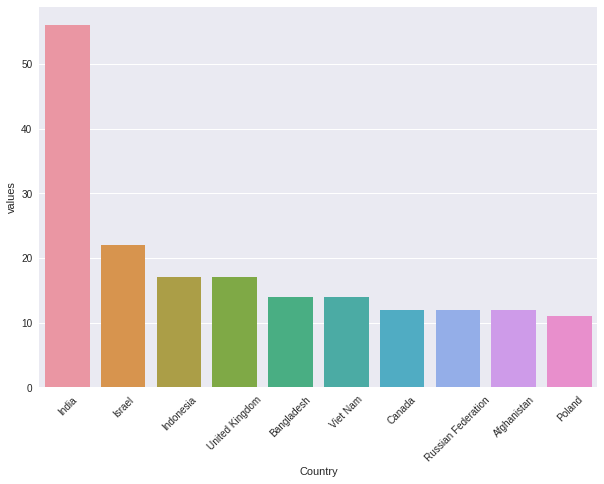

In [195]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Country', y='values', data=noFormal_df.head(10)) #resolvi pegar apenas 10 primeiros registros
plt.xticks(rotation=45) #rotacionando o grafico, se não fica uma bagunça só

plt.show()

### pergunta 7

Utilize o Power BI e o dataset das instruções do enunciado. Crie um gráfico de forma que consiga visualizar quando os desenvolvedores começaram a trabalhar na área (Age1stCode). Com que idade a maioria das pessoas começa a programar no Brasil?

In [196]:
brazil_stack = stackoverflow[stackoverflow['Country'] == 'Brazil']

In [200]:
brazil_age1stCode  = brazil_stack.groupby('Age1stCode').count()['Respondent'].reset_index()

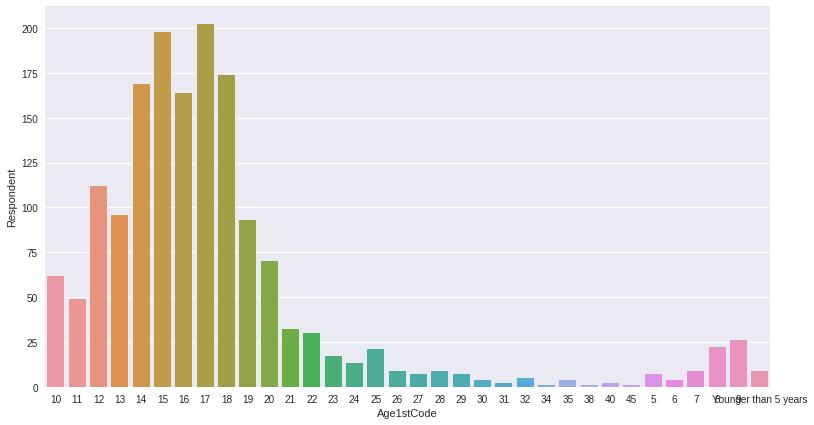

In [206]:
plt.figure(figsize=(13, 7))
sns.barplot(x='Age1stCode', y='Respondent', data=brazil_age1stCode)
plt.show()

## Agora partiremos para o Banco de dados

In [ ]:
import sqlalchemy
import pymysql

In [39]:
con  = sqlalchemy.create_engine('sqlite:///file.sql')

In [98]:

# Create an engine to the baseql database
# carregando a base de dados em sql
engine = sqlalchemy.create_engine('mysql+pymysql://root@127.0.0.1:3307/baseql')
# essa parte do codigo pode ser que não funcione na sua maquina, pois precisa do servidor mysql estar instalado
# e a database tem que ter o mesmo nome nesse caso "baseql" (criatividade passou longe)

# conectando com o localhost
con = engine.connect() 


In [100]:
# Print the table names
print(engine.table_names())


['DEPARTAMENTO', 'DEPENDENTE', 'DEPTO_LOCALIZACOES', 'EMPREGADO', 'PROJETO', 'TRABALHA_EM']


In [105]:
departamento = pd.read_sql_table('DEPARTAMENTO', con) # carregando a Tabela departamento do base de dados 
departamento.to_csv('datasets/departamento.csv', index=None)  # salvando como csv

dependente = pd.read_sql_table('DEPENDENTE', con) # carregando a Tabela departamento do base de dados 
dependente.to_csv('datasets/dependente.csv', index=None)  # salvando como csv

depto_loc = pd.read_sql_table('DEPTO_LOCALIZACOES', con) # carregando a Tabela departamento do base de dados 
depto_loc.to_csv('datasets/depto_localizacoes.csv', index=None)  # salvando como csv

empregado = pd.read_sql_table('EMPREGADO', con) # carregando a Tabela departamento do base de dados 
empregado.to_csv('datasets/empregado.csv', index=None)  # salvando como csv

projeto = pd.read_sql_table('PROJETO', con) # carregando a Tabela departamento do base de dados 
projeto.to_csv('datasets/projeto.csv', index=None)  # salvando como csv

trabalha_em = pd.read_sql_table('TRABALHA_EM', con) # carregando a Tabela departamento do base de dados 
trabalha_em.to_csv('datasets/trabalha_em.csv', index=None)  # salvando como csv

In [247]:
departamento = pd.read_csv('datasets/departamento.csv') #carregando o csv DEPARTAMENTO
dependente = pd.read_csv('datasets/dependente.csv') #carregando o csv DEPENDENTE
depto_loc = pd.read_csv('datasets/depto_localizacoes.csv') #carregando o csv DEPTO_LOCALIZACOES
empregado = pd.read_csv('datasets/empregado.csv') #carregando o csv EMPREGADO
projeto = pd.read_csv('datasets/projeto.csv') #carregando o csv PROJETO
trabalha_em = pd.read_csv('datasets/trabalha_em.csv') # carregando TRABALHA_EM

#lista_de_datasets = [departamento, dependente, depto_loc, empregado, projeto, trabalha_em]

### pergunta 8
Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Qual a média salarial nessa empresa?

In [210]:
empregado.head()

,PNOME,MINICIAL,UNOME,SSN,DATANASC,ENDERECO,SEXO,SALARIO,SUPERSSN,DNO
0,John,B,Smith,123456789,1955-01-09,"731 Fondren, Houston, TX",M,30000.0,987654321.0,5
1,Franklin,T,Wong,333445555,1945-12-08,"638 Voss, Houston, TX",M,40000.0,888665555.0,5
2,Joyce,A,English,453453453,1962-12-31,"5631 Rice, Houston, TX",F,25000.0,333445555.0,5
3,Ramesh,K,Narayan,666884444,1952-09-15,"Fire Oak, Humble, TX",M,38000.0,333445555.0,5
4,James,E,Borg,888665555,1927-11-10,"Stone, Houston, TX",M,55000.0,NaN,1


In [213]:
empregado['SALARIO'].mean()

#Em SQL essa consultaria ficaria:
#SELECT AVG(SALARIO) FROM EMPREGADO 

35125.0

#### Pergunta 9
Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Quantos empregados do departamento 5 trabalham mais de 10h por semana no projeto chamado "ProductX"?
Grupo de escolhas da pergunta


In [232]:
workers_projects = empregado.join(trabalha_em.set_index("ESSN"), on='SSN').join(projeto.set_index('PNUMERO'), on='PNO')

In [234]:
workers_projects.sample(5)

,PNOME,MINICIAL,UNOME,SSN,DATANASC,ENDERECO,SEXO,SALARIO,SUPERSSN,DNO,PNO,HORAS,PJNOME,PLOCALIZACAO,DNUM
1,Franklin,T,Wong,333445555,1945-12-08,"638 Voss, Houston, TX",M,40000.0,888665555.0,5,2,10.0,ProductY,Sugarland,5
7,Alicia,J,Zelaya,999887777,1958-06-19,"Castle, SPring, TX",F,25000.0,987654321.0,4,30,30.0,Newbenefits,Stafford,4
6,Ahmad,V,Jabbar,987987987,1959-03-29,"Dallas, Houston, TX",M,25000.0,987654321.0,4,10,35.0,Computerization,Stafford,4
0,John,B,Smith,123456789,1955-01-09,"731 Fondren, Houston, TX",M,30000.0,987654321.0,5,2,7.5,ProductY,Sugarland,5
3,Ramesh,K,Narayan,666884444,1952-09-15,"Fire Oak, Humble, TX",M,38000.0,333445555.0,5,3,40.0,ProductZ,Houston,5


In [239]:
dpto_5 = workers_projects[workers_projects["DNO"] == 5]

In [240]:
above_10hr = workers_projects[workers_projects['HORAS'] > 10]

In [242]:
eqPrjtX = above_10hr[above_10hr['PJNOME'] == 'ProductX']

In [243]:
eqPrjtX

,PNOME,MINICIAL,UNOME,SSN,DATANASC,ENDERECO,SEXO,SALARIO,SUPERSSN,DNO,PNO,HORAS,PJNOME,PLOCALIZACAO,DNUM
0,John,B,Smith,123456789,1955-01-09,"731 Fondren, Houston, TX",M,30000.0,987654321.0,5,1,32.5,ProductX,Bellaire,5
2,Joyce,A,English,453453453,1962-12-31,"5631 Rice, Houston, TX",F,25000.0,333445555.0,5,1,20.0,ProductX,Bellaire,5


### Pergunta 10
Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Quantos empregados possuem um dependente com o mesmo primeiro nome que o deles?
Grupo de escolhas da pergunta


In [248]:
dependente

,ESSN,NOME_DEPENDENTE,SEX,DATANASC,PARENTESCO
0,123456789,Alice,F,1978-12-30,Daughter
1,123456789,Elizabeth,F,2057-05-04,Spouse
2,123456789,Michael,M,1977-12-31,Son
3,333445555,Alice,F,1977-12-31,Daughter
4,333445555,Joy,F,2048-05-02,Spouse
5,333445555,Teodore,M,1973-10-24,Son
6,987654321,Abner,M,2032-02-28,Spouse


In [249]:
empregado

,PNOME,MINICIAL,UNOME,SSN,DATANASC,ENDERECO,SEXO,SALARIO,SUPERSSN,DNO
0,John,B,Smith,123456789,1955-01-09,"731 Fondren, Houston, TX",M,30000.0,987654321.0,5
1,Franklin,T,Wong,333445555,1945-12-08,"638 Voss, Houston, TX",M,40000.0,888665555.0,5
2,Joyce,A,English,453453453,1962-12-31,"5631 Rice, Houston, TX",F,25000.0,333445555.0,5
3,Ramesh,K,Narayan,666884444,1952-09-15,"Fire Oak, Humble, TX",M,38000.0,333445555.0,5
4,James,E,Borg,888665555,1927-11-10,"Stone, Houston, TX",M,55000.0,NaN,1
5,Jennifer,S,Wallace,987654321,1931-06-20,"Berry, Bellaire, TX",F,43000.0,888665555.0,4
6,Ahmad,V,Jabbar,987987987,1959-03-29,"Dallas, Houston, TX",M,25000.0,987654321.0,4
7,Alicia,J,Zelaya,999887777,1958-06-19,"Castle, SPring, TX",F,25000.0,987654321.0,4


In [257]:
emp_dep = empregado.join(dependente.set_index('ESSN'), on='SSN', lsuffix='_emp')

In [262]:
emp_dep

,PNOME,MINICIAL,UNOME,SSN,DATANASC_emp,ENDERECO,SEXO,SALARIO,SUPERSSN,DNO,NOME_DEPENDENTE,SEX,DATANASC,PARENTESCO
0,John,B,Smith,123456789,1955-01-09,"731 Fondren, Houston, TX",M,30000.0,987654321.0,5,Alice,F,1978-12-30,Daughter
0,John,B,Smith,123456789,1955-01-09,"731 Fondren, Houston, TX",M,30000.0,987654321.0,5,Elizabeth,F,2057-05-04,Spouse
0,John,B,Smith,123456789,1955-01-09,"731 Fondren, Houston, TX",M,30000.0,987654321.0,5,Michael,M,1977-12-31,Son
1,Franklin,T,Wong,333445555,1945-12-08,"638 Voss, Houston, TX",M,40000.0,888665555.0,5,Alice,F,1977-12-31,Daughter
1,Franklin,T,Wong,333445555,1945-12-08,"638 Voss, Houston, TX",M,40000.0,888665555.0,5,Joy,F,2048-05-02,Spouse
1,Franklin,T,Wong,333445555,1945-12-08,"638 Voss, Houston, TX",M,40000.0,888665555.0,5,Teodore,M,1973-10-24,Son
2,Joyce,A,English,453453453,1962-12-31,"5631 Rice, Houston, TX",F,25000.0,333445555.0,5,NaN,NaN,NaN,NaN
3,Ramesh,K,Narayan,666884444,1952-09-15,"Fire Oak, Humble, TX",M,38000.0,333445555.0,5,NaN,NaN,NaN,NaN
4,James,E,Borg,888665555,1927-11-10,"Stone, Houston, TX",M,55000.0,NaN,1,NaN,NaN,NaN,NaN
5,Jennifer,S,Wallace,987654321,1931-06-20,"Berry, Bellaire, TX",F,43000.0,888665555.0,4,Abner,M,2032-02-28,Spouse


In [264]:
emp_dep.loc[:, ['PNOME', 'NOME_DEPENDENTE']]

,PNOME,NOME_DEPENDENTE
0,John,Alice
0,John,Elizabeth
0,John,Michael
1,Franklin,Alice
1,Franklin,Joy
1,Franklin,Teodore
2,Joyce,NaN
3,Ramesh,NaN
4,James,NaN
5,Jennifer,Abner


In [265]:
sum(emp_dep['PNOME'] == emp_dep['NOME_DEPENDENTE'])

0

### Pergunta 11
Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Quais os nomes de todos os empregados que são diretamente supervisionados por Franklin Wong

In [ ]:
#em duvida

### pergunta 12
Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Quem é a pessoa que possui mais tempo de alocação no projeto 'Newbenefits'?

In [284]:
workers_projects = empregado.join(trabalha_em.set_index("ESSN"), on='SSN').join(projeto.set_index('PNUMERO'), on='PNO')

In [289]:
workers_projects[workers_projects['PJNOME'] == 'Newbenefits'].sort_values('HORAS', ascending=False)

,PNOME,MINICIAL,UNOME,SSN,DATANASC,ENDERECO,SEXO,SALARIO,SUPERSSN,DNO,PNO,HORAS,PJNOME,PLOCALIZACAO,DNUM
7,Alicia,J,Zelaya,999887777,1958-06-19,"Castle, SPring, TX",F,25000.0,987654321.0,4,30,30.0,Newbenefits,Stafford,4
5,Jennifer,S,Wallace,987654321,1931-06-20,"Berry, Bellaire, TX",F,43000.0,888665555.0,4,30,20.0,Newbenefits,Stafford,4
6,Ahmad,V,Jabbar,987987987,1959-03-29,"Dallas, Houston, TX",M,25000.0,987654321.0,4,30,5.0,Newbenefits,Stafford,4


### pergunta 13
Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Qual é a soma dos salários de todos os empregados do departamento chamado 'Research'?

In [295]:
emp_depto = empregado.join(departamento.set_index('DNUMERO'), on='DNO')

In [298]:
emp_depto[emp_depto['DNOME'] == 'Research']

,PNOME,MINICIAL,UNOME,SSN,DATANASC,ENDERECO,SEXO,SALARIO,SUPERSSN,DNO,DNOME,GERSSN,GERDATAINICIO
0,John,B,Smith,123456789,1955-01-09,"731 Fondren, Houston, TX",M,30000.0,987654321.0,5,Research,NaN,1978-05-22
1,Franklin,T,Wong,333445555,1945-12-08,"638 Voss, Houston, TX",M,40000.0,888665555.0,5,Research,NaN,1978-05-22
2,Joyce,A,English,453453453,1962-12-31,"5631 Rice, Houston, TX",F,25000.0,333445555.0,5,Research,NaN,1978-05-22
3,Ramesh,K,Narayan,666884444,1952-09-15,"Fire Oak, Humble, TX",M,38000.0,333445555.0,5,Research,NaN,1978-05-22


In [300]:
sum(emp_depto[emp_depto['DNOME'] == 'Research']['SALARIO'])

133000.0

### pergunta 14
Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Qual seria o custo do projeto com folha salarial (soma de todos os salários) caso a empresa desse 10% de aumento para todos os empregados que trabalham no projeto 'ProductX'?

In [302]:
workers_projects = empregado.join(trabalha_em.set_index("ESSN"), on='SSN').join(projeto.set_index('PNUMERO'), on='PNO')

In [306]:
salario_work_pjX = workers_projects[workers_projects['PJNOME'] == 'ProductX']['SALARIO']

In [312]:
sum(salario_work_pjX) + (sum(salario_work_pjX) * 0.10)

60500.0

### Pergunta 15
Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Qual o nome do departamento com a menor média de salário entre seus funcionários?

In [325]:
work_dept = empregado.join(departamento.set_index('DNUMERO'), on='DNO')

In [326]:
work_dept

,PNOME,MINICIAL,UNOME,SSN,DATANASC,ENDERECO,SEXO,SALARIO,SUPERSSN,DNO,DNOME,GERSSN,GERDATAINICIO
0,John,B,Smith,123456789,1955-01-09,"731 Fondren, Houston, TX",M,30000.0,987654321.0,5,Research,NaN,1978-05-22
1,Franklin,T,Wong,333445555,1945-12-08,"638 Voss, Houston, TX",M,40000.0,888665555.0,5,Research,NaN,1978-05-22
2,Joyce,A,English,453453453,1962-12-31,"5631 Rice, Houston, TX",F,25000.0,333445555.0,5,Research,NaN,1978-05-22
3,Ramesh,K,Narayan,666884444,1952-09-15,"Fire Oak, Humble, TX",M,38000.0,333445555.0,5,Research,NaN,1978-05-22
4,James,E,Borg,888665555,1927-11-10,"Stone, Houston, TX",M,55000.0,NaN,1,Headquarters,888665555.0,1971-06-19
5,Jennifer,S,Wallace,987654321,1931-06-20,"Berry, Bellaire, TX",F,43000.0,888665555.0,4,Administration,NaN,1985-01-01
6,Ahmad,V,Jabbar,987987987,1959-03-29,"Dallas, Houston, TX",M,25000.0,987654321.0,4,Administration,NaN,1985-01-01
7,Alicia,J,Zelaya,999887777,1958-06-19,"Castle, SPring, TX",F,25000.0,987654321.0,4,Administration,NaN,1985-01-01


In [328]:
dept_mean_salary = work_dept.groupby('DNOME')['SALARIO'].mean()

In [331]:
dept_mean_salary.sort_values()

DNOME
Administration    31000.0
Research          33250.0
Headquarters      55000.0
Name: SALARIO, dtype: float64